In [106]:
url = input()

In [107]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [108]:
# open the link
page = requests.get(url)
if page.status_code != 200:
    print('couldn\'t open url')

soup = BeautifulSoup(page.text, "html.parser")

In [109]:
# find the list of relationships on site
ships = soup.find('dd', {'id':'include_relationship_tags'}).find('ul')

In [110]:
# add every ship to the list
ship_list_raw = []
for li in ships.find_all('li'):
    ship_list_raw.append(li.text.strip())


In [111]:
# separate name and number of works from str
ship_list = []
for str in ship_list_raw:
    ship_list.append(str.rsplit(' ',1))

df = pd.DataFrame(ship_list,columns=['Ship name', 'Number of works']).set_index('Ship name')
df['Number of works'] = df['Number of works'].str.replace(r'\D', '').astype(int)
df.head()


C:\Users\tnjtv\AppData\Local\Temp\ipykernel_5336\2723907363.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Number of works'] = df['Number of works'].str.replace(r'\D', '').astype(int)


,Number of works
Ship name,
Daryl Dixon/Rick Grimes,3597
Daryl Dixon/Beth Greene,2670
Daryl Dixon/Carol Peletier,2064
Daryl Dixon/Original Female Character(s),1384
Rick Grimes/Michonne,1264


array([<AxesSubplot:>], dtype=object)

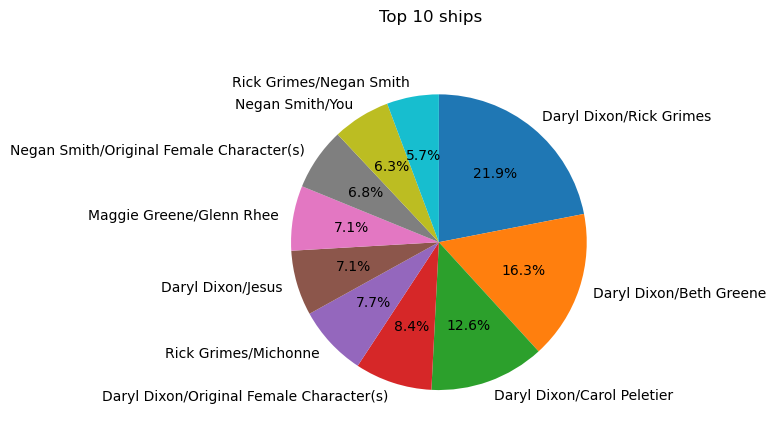

In [114]:
df.plot(kind='pie', startangle=90, subplots=True, autopct='%1.1f%%', legend=False,ylabel = '',counterclock=False,title='Top {} ships'.format(len(df.index)))

<AxesSubplot:title={'center':'Top 10 ships'}>

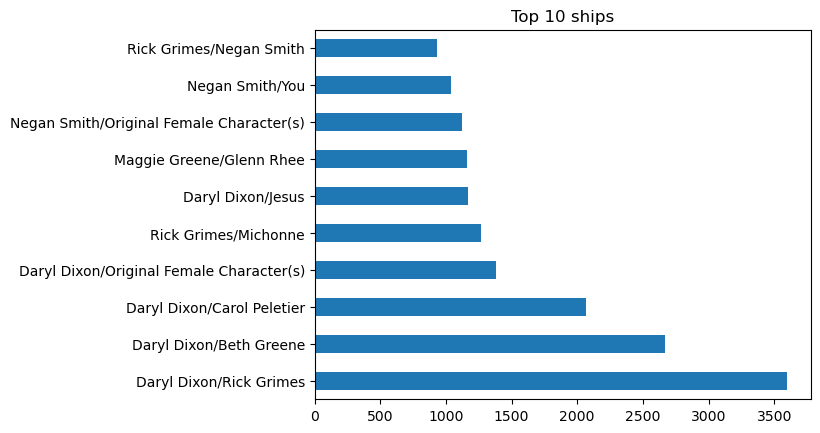

In [115]:
df.plot(kind='barh',title='Top {} ships'.format(len(df.index)),ylabel='Number of works',xlabel='',legend=False)
